# Main testing

In [1]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *

## Creazione dell environment

In [2]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                          ..................}                                   
                          ....@......`                                          
                          ..............`                                       
                          ..................                                    
                          .

In [3]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

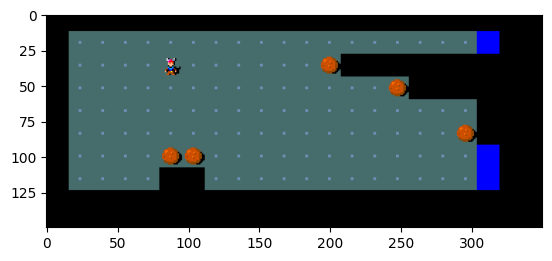

In [4]:
plt.imshow(state['pixel'][100:250, 400:750]) #Immagine ristretta con range [y][x]

In [5]:
game_map = state['chars']
game = state['pixel']

## Finding coordinates
Searching for the coordinates of the player, all the boulders and river

In [6]:
start = get_player_location(game_map)
boulders = get_boulder_locations(game_map)
print("Agent position:", start)


Agent position: (8, 30)


Coordinates of each block present in the map

In [7]:
boulders

[(8, 37), (9, 40), (11, 43), (12, 30), (12, 31)]

Calcolo la distanza del player dal blocco più vicino

In [8]:
target_block_position, distance = get_min_distance_point_to_points(start[0],start[1],boulders)
print("Target position:", target_block_position, "Distance:", distance)

Target position: [12, 30] Distance: 4


### Finding river positions

In [9]:
river_positions = get_river_locations(game_map)

In [10]:
#Lista con le posizioni del fiume
river_positions

[(7, 44), (12, 44), (13, 44)]

In [11]:
k = get_min_distance_point_to_points(boulders[0][0],boulders[0][1], river_positions)

In [12]:
print(k)

([7, 44], 7)


In [13]:
#Get the best distance from player to boulder and boulder to river.

def get_best_global_distance(start: Tuple[int, int], boulders: List[List], river_positions : List[Tuple[int,int]]) -> Tuple[int, int]:
    distances = []
    

    for boulder in boulders:
        x = boulder[0]
        y = boulder[1]
        '''b_dx = (x, y+1)
        b_sx = (x, y-1)

        if b_dx in boulders:
            continue
        if b_sx in boulders:
            continue '''
        dist_player_boulder = get_optimal_distance_point_to_point(start, boulder)
        
        dist_boulder_river = get_min_distance_point_to_points(boulder[0],boulder[1], river_positions)
        dist = dist_player_boulder + dist_boulder_river[1]
        distances.append((x, y, dist))

    min_distance = min(distances, key=lambda x: x[2])
    return min_distance[0], min_distance[1]
    

### Getting the coordinates of the best boulder to push

In [14]:
coordinates_min_boulder = get_best_global_distance(start, boulders, river_positions)
print("Coordinates of the best boulder to push: ",coordinates_min_boulder)

Coordinates of the best boulder to push:  (8, 37)


## Complete path player - boulder - river

1) A star calculates the path from the player to the optimal boulder to push
2) A star calculates the path from the boulder reached to the nearest river position

In [15]:
path_player_boulder = a_star(game,game_map, start, coordinates_min_boulder, get_optimal_distance_point_to_point)
print(path_player_boulder)

[(8, 30), (7, 31), (7, 32), (7, 33), (7, 34), (7, 35), (7, 36), (8, 37)]


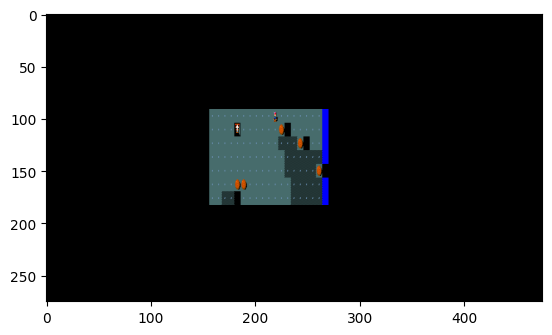

In [17]:
actions, names = actions_from_path(start, path_player_boulder[1: -1]) #Remove first and last action
import time

player_pos = plot_animated_sequence(env,game, game_map,actions)


In [18]:
names

['NE', 'E', 'E', 'E', 'E', 'E']

In [19]:
player_pos

[(7, 31), (7, 32), (7, 33), (7, 34), (7, 35), (7, 36)]